# Beating Jordan Belfort... Legally

Lab 1: Exploring Table Data by Charles Patterson

## Business Understanding

The main purpose of this data set is to predict how stocks will preform during their first year, based on the first year preformance of all companies that were public as of Jan. 2018

The publisher of the data set said on Kaggle, "The data contains information about the U.S. stocks of companies (before going public), information such as the number of employees, the location of the headquarters, when the company declares a fiscal month, metadata about ownership and more. Of course y you wouldn't be able to validate the results of any predictions without the results of the stock. Thus the first fiscal year after going public has data contained within it (including the open, close, volume and high of each day)."  Furthermore, the publisher says, "Much appreciation to the following areas where financial information was found: reuters.com, yahoo finance, IPOScoop, & more that I don't have a trace of. Much appreciation to the following software sources: Pandas, interrupting cow, beautiful soup, & more that I don't have a trace of."

The foremost challenge of this problem is the preformance.  Not only must a trading algorithm make money, but it most outpreform third party algorithms and analysis.  Advantageously, this particular data set has a focus on stocks during their first year of going public when stocks typically have high volitility and potential for large returns.  Due to the nicheness of this data set, there is a possibility for novel information, which is why I chose this data set specifically.

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

original = pd.read_csv('IPODataFull.csv', encoding = 'unicode_escape')
original.head()

,Symbol,DaysBetterThanSP,daysProfit,daysProfitGrouped,exactDiffernce,Year,Month,Day,dayOfWeek,closeDay0,...,usableCEOAge,usableCEOGender,usablePresidentAge,usablePresidentGender,FoundingDateGrouped,yearDifferenceGrouped,Profitable,Safe,HomeRunDay,HomeRun
0,A,122,249,200+,NaN,1999,11,18,3,28.6358,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,77.0,1
1,AAC,131,262,200+,232.0,2014,10,2,3,18.5000,...,40 - 49,male,Blank,Blank,2011 - present,Unknown,1,1,NaN,0
2,AAOI,125,262,200+,6054.0,2013,9,26,3,9.9600,...,Blank,Blank,Blank,Blank,1951 - 2000,Unknown,1,0,NaN,0
3,AAP,128,261,200+,NaN,2001,11,29,3,13.9000,...,Blank,Blank,Blank,Blank,1901 - 1950,Unknown,1,0,NaN,0
4,AAT,123,127,100 - 149,181.0,2011,1,13,3,21.2500,...,Blank,Blank,Blank,Blank,2001 - 2010,Unknown,0,0,NaN,0


### Attributes

One of the major challenges of this dataset is the that it has 1664 attributes.  Therefore, I elected to do some slight exploring for attributes that don't have much missing data, and will likely help me predict one of my three prediction variables, home run, safe, and profitable.  These variables are DaysBetterThanSP, daysProfit, Year, MarketCap, Sector, CEOAge, employees, and stateCountry.

In [2]:
#I adapted this code from class

#Cleaning and dividing the data
import copy
        
#This makes a copy of the dataset with the 7 variables I want to use to predict home run, safe, and profitable stocks
df = copy.deepcopy(original)
df = df[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "Sector", "CEOAge", "stateCountry", "Safe", "HomeRun", "Profitable"]]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 10 columns):
DaysBetterThanSP    3762 non-null int64
daysProfit          3762 non-null int64
Year                3762 non-null int64
MarketCap           3585 non-null float64
Sector              3046 non-null object
CEOAge              3008 non-null float64
stateCountry        2885 non-null object
Safe                3762 non-null int64
HomeRun             3762 non-null int64
Profitable          3762 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 294.0+ KB


The data types the data frames are as defined above.

Essentially, all the data is either numerical data, with the exeption of Sector and stateCountry, which our are categorical data.

### Data Quality

With regards to data quality, some of the entries have missing data.  Fortunatily, the variables I am hoping to predict, home run, safe, and profitable, have no missing data.  The rest of the data I chose to impute, because I had most of the data and these variables were going to help me predict home run, safe, and profitable stocks.

In [3]:
df.describe()

,DaysBetterThanSP,daysProfit,Year,MarketCap,CEOAge,Safe,HomeRun,Profitable
count,3762.000000,3762.000000,3762.000000,3.585000e+03,3008.000000,3762.000000,3762.000000,3762.000000
mean,103.753057,138.153642,2008.578416,4.914519e+09,54.812500,0.173844,0.069378,0.527645
std,34.461156,100.677813,6.532543,2.719230e+10,7.738885,0.379025,0.254130,0.499302
min,0.000000,0.000000,1996.000000,7.930652e+04,24.000000,0.000000,0.000000,0.000000
25%,96.000000,32.000000,2004.000000,1.522083e+08,50.000000,0.000000,0.000000,0.000000
50%,116.000000,143.000000,2010.000000,5.726185e+08,55.000000,0.000000,0.000000,1.000000
75%,126.000000,247.000000,2014.000000,2.282230e+09,60.000000,0.000000,0.000000,1.000000
max,170.000000,262.000000,2018.000000,7.270000e+11,84.000000,1.000000,1.000000,1.000000


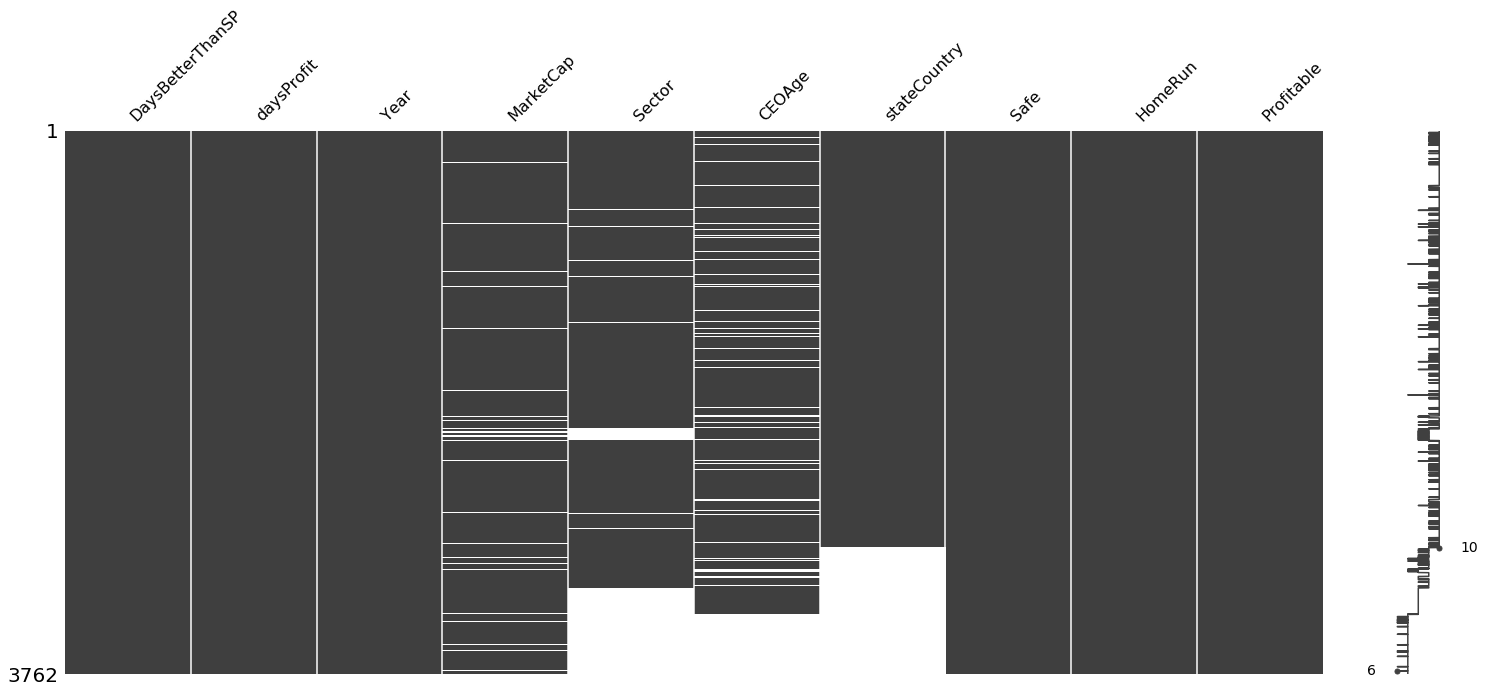

In [4]:
#I got this from class

import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df.sort_values(by=["stateCountry","Sector","CEOAge"]))

The above graph shows that four variables have missing data, but as stated earlier, they are not missing too much data, and they are not the variables I am trying to predict, so I'm going to impute them.

In [5]:
#I also got this code from class

from sklearn.impute import KNNImputer
import copy

knn_obj = KNNImputer(n_neighbors=8)

temp = df[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge", "Safe", "HomeRun", "Profitable"]].to_numpy()

knn_obj.fit(temp)
temp_imputed = knn_obj.transform(temp)

df_imputed = copy.deepcopy(df) 
df_imputed[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge", "Safe", "HomeRun", "Profitable"]] = temp_imputed
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 10 columns):
DaysBetterThanSP    3762 non-null float64
daysProfit          3762 non-null float64
Year                3762 non-null float64
MarketCap           3762 non-null float64
Sector              3046 non-null object
CEOAge              3762 non-null float64
stateCountry        2885 non-null object
Safe                3762 non-null float64
HomeRun             3762 non-null float64
Profitable          3762 non-null float64
dtypes: float64(8), object(2)
memory usage: 294.0+ KB


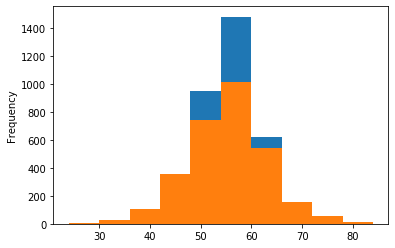

In [6]:
df_imputed.CEOAge.plot(kind = "hist")
df.CEOAge.plot(kind = "hist")

Looking at the graph above, I believe the imputation went fine. 

Now I just need to impute the categorical variables.

In [7]:
#I got this code from 
#https://towardsdatascience.com/preprocessing-encode-and-knn-impute-all-categorical-features-fast-b05f50b4dfaa

#instantiate both packages to use
from fancyimpute import KNN
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
imputer = KNN()
# create a list of categorical columns to iterate over
cat_cols = ["Sector", "stateCountry"]

def encode(data):
    '''function to encode non-null data and replace it in the original data'''
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

#create a for loop to iterate through each column in the data
for columns in cat_cols:
    encode(df_imputed[columns])
    
# impute data and convert 
df_final = pd.DataFrame(np.round(imputer.fit_transform(df_imputed)),columns = df_imputed.columns)
df_final.info()

Using TensorFlow backend.


Imputing row 1/3762 with 0 missing, elapsed time: 1.931
Imputing row 101/3762 with 0 missing, elapsed time: 1.933
Imputing row 201/3762 with 0 missing, elapsed time: 1.934
Imputing row 301/3762 with 0 missing, elapsed time: 1.935
Imputing row 401/3762 with 2 missing, elapsed time: 1.938
Imputing row 501/3762 with 0 missing, elapsed time: 1.940
Imputing row 601/3762 with 0 missing, elapsed time: 1.941
Imputing row 701/3762 with 0 missing, elapsed time: 1.943
Imputing row 801/3762 with 0 missing, elapsed time: 1.944
Imputing row 901/3762 with 0 missing, elapsed time: 1.945
Imputing row 1001/3762 with 0 missing, elapsed time: 1.948
Imputing row 1101/3762 with 1 missing, elapsed time: 1.950
Imputing row 1201/3762 with 0 missing, elapsed time: 1.952
Imputing row 1301/3762 with 0 missing, elapsed time: 1.955
Imputing row 1401/3762 with 0 missing, elapsed time: 1.958
Imputing row 1501/3762 with 0 missing, elapsed time: 1.960
Imputing row 1601/3762 with 0 missing, elapsed time: 1.962
Imputing 

In [8]:
# In the above imputator, I coded the data into numeric values, 
# so I am going to decode them so I can get better visualizations.
decode = ["Basic Industries", "Capital Goods", "Consumer Durables", "Consumer Non-Durables", 
          "Consumer Services", "Energy", "Finance", "Health Care", "Miscellaneous", "Public Utilities", 
          "Technology", "Transportation"]

df_finalSector = []
for i in df_final["Sector"]:
    index = int(i)
    i = decode[index]
    df_finalSector.append(i)
    
df_final["Sector"] = df_finalSector

In [9]:
# This decodes the stateCountry varible
decode = ["AK", "AL", "AR", "AZ", "Argentina", "Australia", "Belgium", "Bermuda", "Brazil", "CA", "CO", "CT", 
                "Canada", "Cayman Islands", "Chile", "China", "Colombia", "Cyprus", "DC", "DE", "Denmark", "FL", 
                "France", "GA", "Germany", "Greece", "HI", "IA", "ID", "IL", "IN", "India", "Indonesia", "Ireland", 
                "Israel", "Japan", "KS", "KY", "LA", "MA", "MD", "ME", "MI", "MN", "MO", "MS", "MT", 
                "Marshall Islands", "Mexico", "Monaco", "NC", "ND", "NE", "NH", "NJ", "NM", "NV", "NV", "NY", 
                "NYArconic", "Netherlands", "Norway", "OH", "OK", "OR", "PA", "Peru", "Puerto Rico", "RI", "Russia", 
                "SC", "SD", "South Africa", "South Korea", "Spain", "Sweden", "Switzerland", "TN", "TX", "Taiwan", 
                "The Netherlands", "Turkey", "US Virgin Islands", "UT", "United Kingdom", "Uruguay", 
                "VA", "VT", "WA", "WI", "WV", "WY", "the Bahamas", "the Netherlands", 
                "the United Arab Emirates", "the United Kingdom"]

df_finalStateCountry = []
for i in df_final["stateCountry"]:
    index = int(i)
    i = decode[index]
    df_finalStateCountry.append(i)
    
df_final["stateCountry"] = df_finalStateCountry

In [10]:
# For grins and giggles here is the number of companies started in various states and countries
    
df_group = df_final.groupby(by = "stateCountry")
for val,grp in df_group:
    print("There were", len(grp), "companies that started in", val)

There were 3 companies that started in AK
There were 9 companies that started in AL
There were 5 companies that started in AR
There were 28 companies that started in AZ
There were 10 companies that started in Argentina
There were 7 companies that started in Australia
There were 7 companies that started in Belgium
There were 38 companies that started in Bermuda
There were 19 companies that started in Brazil
There were 453 companies that started in CA
There were 82 companies that started in CO
There were 62 companies that started in CT
There were 114 companies that started in Canada
There were 23 companies that started in Cayman Islands
There were 18 companies that started in Chile
There were 156 companies that started in China
There were 21 companies that started in Colombia
There were 10 companies that started in Cyprus
There were 17 companies that started in DC
There were 16 companies that started in DE
There were 18 companies that started in Denmark
There were 108 companies that star

## Data Visualization

### Visualizations

Initally, I just went through all of the predictor variables and made an appropriate plot to get a feel for the data.

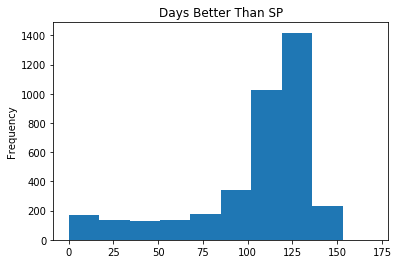

In [11]:
df_final.DaysBetterThanSP.plot(kind = "hist", title = "Days Better Than SP")

# This graph shows the number of companies in groups of how many days better than the SP they were.
# When considering that the number of fiscal days in a year are 262, it makes since that many of the companies
# do better around 130 days, some are slightly better, and then maybe 1/5 are below the major spike between 100-130

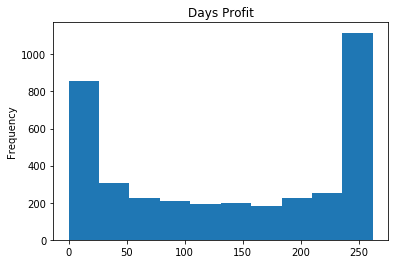

In [12]:
df_final.daysProfit.plot(kind = "hist", title = "Days Profit")

# This is a very interesting graph in my opinion, this shows that half the companies either don't make a profit
# the vast majority of the year,  make a profit almost every day of the year.  Meanwhile, the other half are 
# roughly a uniform distribution of days profit.

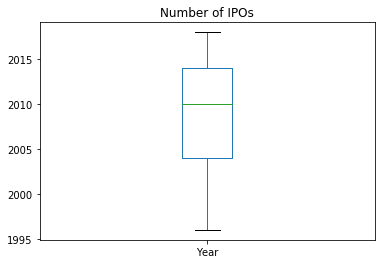

In [13]:
df_final.Year.plot(kind = "box", title = "Number of IPOs")

# This graph shows the year of IPO for companies that were publicly traded as of Jan. 2018.
# This makes things interesting, because the data sugges the middle half of companies publically traded IPOd
# sometime in the 7-17 years.  I think this might emphasize the desire to predict how well a company will do 
# based on the it's early preformance data.

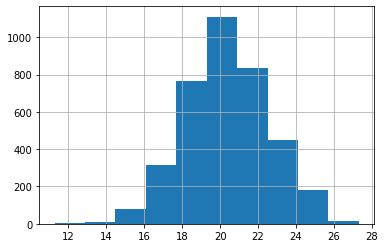

In [14]:
df_final["MarketCap"].apply(np.log).hist()

# This graph indicates that the log market cap of publically traded companies roughly follow a guassian distribution.
# This means logistic regression could be very promising.

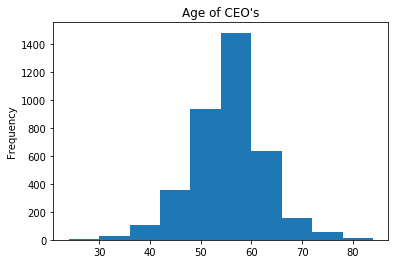

In [15]:
df_final.CEOAge.plot(kind = "hist", title = "Age of CEO's")

# Not unlike the log market cap, the CEO age also follows a rough gaussian distribution, which would allow for good 
# logistic regression.  Furthermore, it is interesting to know the rough median age of CEO's is 55-60.  I think it
# would be worth attempting to discover if Age has something to do with profitability and home run.  I might take a 
# guess that younger CEOs have a better chance of Home Run'ing and older CEO's tend to have more profitable companies.

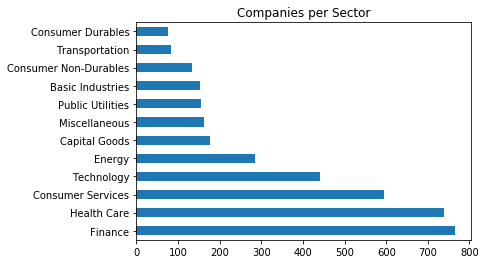

In [16]:
df_final["Sector"].value_counts().plot(kind = "barh", title = "Companies per Sector")

# This graph is kinda handy in figuring out roughly how many companies are in different industries.  
# A key takaway is if there are crazy results later for Consumer Durables, perhaps that statistic should be taken
# with a grand assult, because of the lack of companies in that sector.
# That being said, even in consumer durables, there is decent sample size, so running statistical analysis should
# be very doable.

### Questions

Question 1: What is the percent chance of a stock being a home run, safe or profitable based on Sector and age range?

In [17]:
# I also got this from class

df_final['age_range'] = pd.cut(df_imputed['CEOAge'],[0,50,55,60,1e6],
                                 labels=['young','early 50s','late 50s','old']) # this creates a new variable
df_final.age_range.describe()
print(df_final.age_range.value_counts())

late 50s     1173
early 50s    1027
young         834
old           728
Name: age_range, dtype: int64


6.93 % of all stocks are Home Runs


Text(0.5, 1.0, '% Home Runs by Sector and Age')

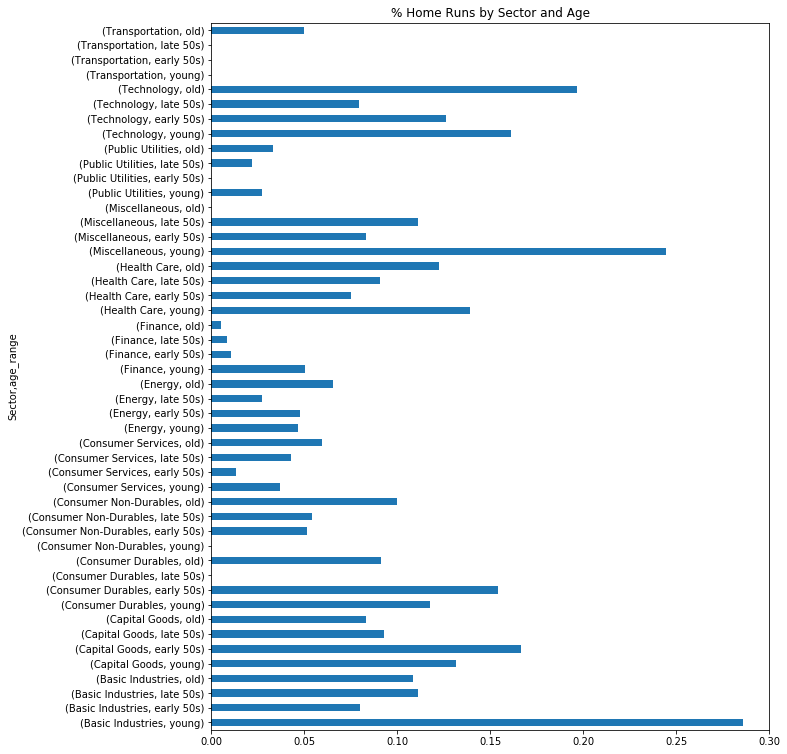

In [18]:
#https://realpython.com/python-rounding/
def trunck(n):
    return int(n*10000) / 10000

df_grouped = df_final.groupby(by=['Sector','age_range'])
HomeRunPerc = df_grouped.HomeRun.sum() / df_grouped.HomeRun.count()

print(100 * trunck(df_final.HomeRun.sum() / df_final.HomeRun.count()), "% of all stocks are Home Runs")

HomeRunPerc.plot(kind='barh', figsize=(10,13))
plt.title('% Home Runs by Sector and Age')

# This grpah shows the percentage of stocks that were home runs based on their industry and the age range of the CEO.
# Keeping in mind that only 7% of stocks Home Run to begin with, I find it interesting which industries are more 
# likely to Home Run than others.  For example, in the Health Care sector, the chances of Home Running are quite
# small, meanwhile, technology and Basic Industries have a much better chance.  Furthermore, depending on the 
# industry, having a young CEO some times helps, like in the case of Miscellaneous and Basic Industries, 
# but in the case of Consumer Non-Durables, having a young CEO does not help.

17.380000000000003 % of all stocks are Safe


Text(0.5, 1.0, 'Safe Stocks by Sector and Age')

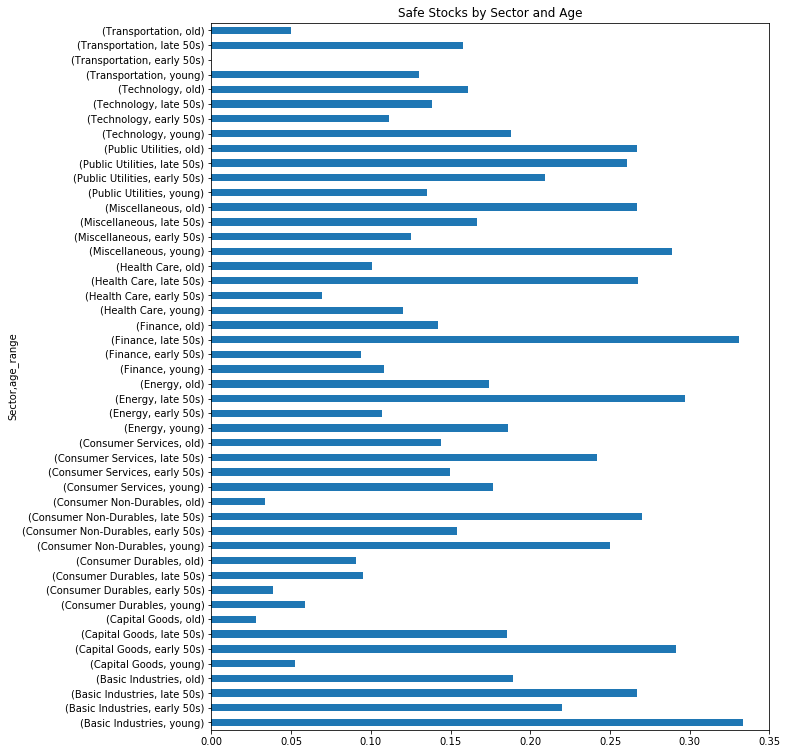

In [19]:
df_grouped = df_final.groupby(by=['Sector','age_range'])
SafePerc = df_grouped.Safe.sum() / df_grouped.Safe.count()

print(100 * trunck(df_final.Safe.sum() / df_final.Safe.count()), "% of all stocks are Safe")

SafePerc.plot(kind='barh', figsize=(10,13))
plt.title('Safe Stocks by Sector and Age')

# This graph I found to be the most interesting of the three, because of the wide variety of results.  
# I think this is an interesting reference graph for what industries are safer and with what CEO age, but I do
# not know if I can say anything more than here's some industries that are safer than others.

52.76 % of all stocks are Profitable


Text(0.5, 1.0, 'Profitable Stocks by Sector and Age')

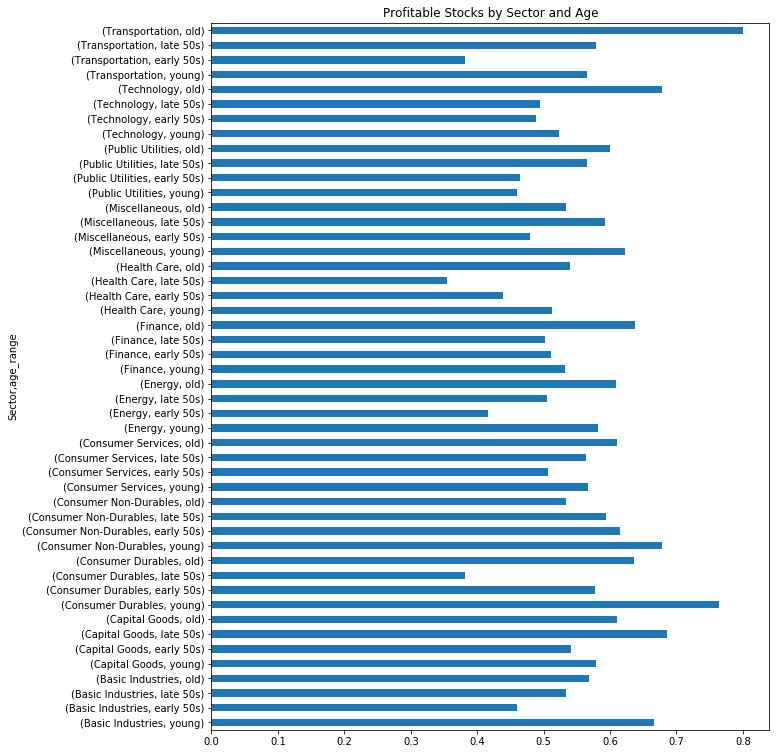

In [20]:
df_grouped = df_final.groupby(by=['Sector','age_range'])
ProfPerc = df_grouped.Profitable.sum() / df_grouped.Profitable.count()

print(100 * trunck(df_final.Profitable.sum() / df_final.Profitable.count()), "% of all stocks are Profitable")

ProfPerc.plot(kind='barh', figsize=(10,13))
plt.title('Profitable Stocks by Sector and Age')

# This graph is similar to the one above, but this time graphed against Profitable instead of Home Run.
# One of the things that immideatily jumps out at me, is that with limited exception, "old" CEO's tend to preform 
# better than their younger counterparts in their respected industry. 
# I also quickly noticed the stocks that seem really safe, are not likily to Home Run, which makes sense on a 
# risk reward basis.  An example of this in the transportation industry, where there are some very safe stocks, 
# but almost none of them "Home Runned".

In [21]:
# This is not neccisarily one of my formal three questions, but I was curious about the number of Home Run stocks that
# were actually profitable
safe = []
HR = []
count = 0
numSafe = 0
for i in df_final["Safe"]:
    safe.append(i)
for i in df_final["HomeRun"]:
    HR.append(i)
for i in range(len(df_final["Safe"])):
    if (safe[i] == HR[i] and safe[i] == 1):
        count += 1
    if (safe[i] == 1):
        numSafe += 1
print(count)
print("%", trunck(count / 3764), "is the percent of stocks that HomeRun and are safe.")
print("%", trunck(count / numSafe), "is the percent of Safe stocks that HomeRun")

68
% 0.018 is the percent of stocks that HomeRun and are safe.
% 0.1039 is the percent of Safe stocks that HomeRun


Question 2:  How do age and sector influence the number of days profit

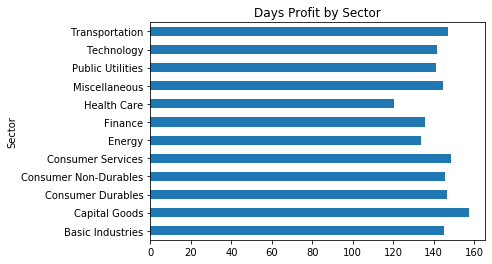

In [22]:
df_grouped = df_final.groupby(by='Sector')

avgDaysProfit = df_grouped.daysProfit.sum() / df_grouped.daysProfit.count()

ax = avgDaysProfit.plot(kind='barh')
plt.title('Days Profit by Sector')

plt.plot(figsize=(20,10))
plt.show()

# This graph is interesting because it does not really show a whole lot.  It almost appears from this graph that
# the difference from sector to sector does not change that much.

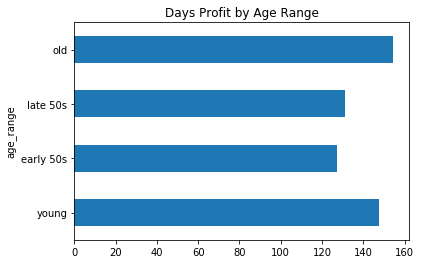

In [23]:
df_grouped = df_final.groupby(by='age_range')

ProfPerc = df_grouped.daysProfit.sum() / df_grouped.daysProfit.count()

ax = ProfPerc.plot(kind='barh')
plt.title('Days Profit by Age Range')

plt.plot(figsize=(20,10))
plt.show()

# This graph, alike the one above it, is also interesting for the same reason the above graph is, not much is 
# changing for one age range to the next.  However, in the next graph, I will show why this is interesting.

Text(0.5, 1.0, 'Days Profit by Sector and Age Range')

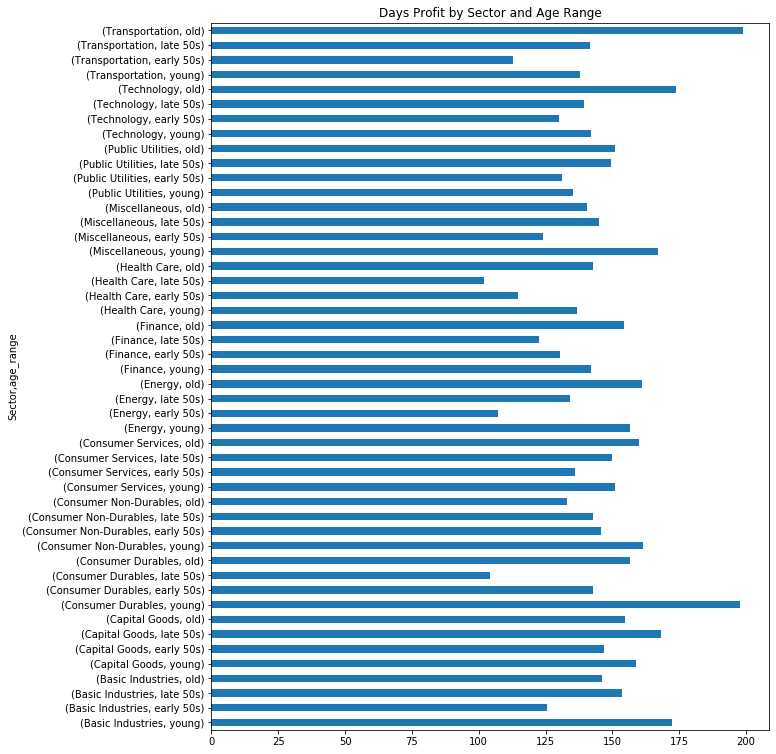

In [24]:
df_grouped = df_final.groupby(by=["Sector", 'age_range'])
ProfPerc = df_grouped.daysProfit.sum() / df_grouped.daysProfit.count()

ProfPerc.plot(kind='barh', figsize=(10,13))
plt.title('Days Profit by Sector and Age Range')

# This graph explores the days profit against Sector and Age.  I think it is interesting to see how the age variable
# creates a lot of variation within industries, and how it is not ideal to be super young, or super old across
# all industries.

Question 3:  If we wanted to build a logistic regression classifier, would we run into multicolinearity issues?

In [25]:
df_final.corr()

,DaysBetterThanSP,daysProfit,Year,MarketCap,CEOAge,Safe,HomeRun,Profitable
DaysBetterThanSP,1.000000,0.181341,0.049826,0.007923,0.030350,0.415624,0.004841,0.160618
daysProfit,0.181341,1.000000,-0.045804,0.032232,0.046120,0.236302,0.246232,0.915280
Year,0.049826,-0.045804,1.000000,-0.015656,-0.133569,0.132376,-0.094330,-0.059276
MarketCap,0.007923,0.032232,-0.015656,1.000000,-0.019992,0.024065,0.022725,0.023098
CEOAge,0.030350,0.046120,-0.133569,-0.019992,1.000000,0.008531,-0.037404,0.053705
Safe,0.415624,0.236302,0.132376,0.024065,0.008531,1.000000,0.062459,0.217658
HomeRun,0.004841,0.246232,-0.094330,0.022725,-0.037404,0.062459,1.000000,0.216429
Profitable,0.160618,0.915280,-0.059276,0.023098,0.053705,0.217658,0.216429,1.000000


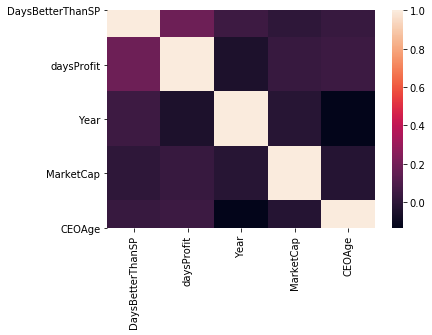

In [26]:
#In case you'd rather see a heat map

import seaborn as sb
corr = df_final[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]].corr()
sb.heatmap(corr)

This is a rather interesting graph, not because of what is correlated, but what is not correlated.  In fact, the most correlated variables are are days profit and days better than SP, but even then their correlation is 0.18 which is pretty weak.  This actaully works well if someone wants to do logistic regression for the safe, profitable, and home run variables because this would gaurd against multicolinearity problems.

## Execptional Work

For this section I will create and interpret logistic regression models for Safe, Profitable and Home Run stocks.

In [27]:
# I got this code from 
# https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
import seaborn as sb

LR = LogisticRegression()
rfe = RFE(LR, 20)
rfe = rfe.fit(df_final[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]], df_final["HomeRun"].ravel())
print(rfe.support_)
print(rfe.ranking_)
rfe = rfe.fit(df_final[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]], df_final["Safe"].ravel())
print(rfe.support_)
print(rfe.ranking_)
rfe = rfe.fit(df_final[["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]], df_final["Profitable"].ravel())
print(rfe.support_)
print(rfe.ranking_)


[ True  True  True  True  True]
[1 1 1 1 1]
[ True  True  True  True  True]
[1 1 1 1 1]
[ True  True  True  True  True]
[1 1 1 1 1]


The above block of code has allowed us to search for variables that would potential be beneficial to have in our logistic regression model.  Since all of the variables came back true, for all three prediction variables, I will use all of these variables in the regression model.

In [28]:
# I got this code from the same website in the previous cell

vars = ["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]
X=df_final[vars]
y=df_final['Safe']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

# I left analysis for each of the models below the model themselves.

Optimization terminated successfully.
         Current function value: 0.002680
         Iterations 22
                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.994  
Dependent Variable:   Safe             AIC:              30.1622
Date:                 2020-02-09 18:15 BIC:              61.3257
No. Observations:     3762             Log-Likelihood:   -10.081
Df Model:             4                LL-Null:          -1737.8
Df Residuals:         3757             LLR p-value:      0.0000 
Converged:            1.0000           Scale:            1.0000 
No. Iterations:       22.0000                                   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
DaysBetterThanSP 31.5071  12.5935  2.5018 0.0124  6.8242 56.1900
daysProfit       -0.0244   0.0141 -1.7319 0.0833 -0.0521  0.0032
Year        

What the above output is showing is that the DaysBetterThanSP and Year are the 2 variable that are really meaningful in the model, at a significance level of 5%.  In other words, those are the only two variables where the probability of NOT being meaningfully is LESS than 5%.  

In the model below, I took out the varibles that were not statistically significant.

In [29]:
vars = ["DaysBetterThanSP", "Year"]
X=df_final[vars]
y=df_final['Safe']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.003465
         Iterations 21
                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.992  
Dependent Variable:   Safe             AIC:              30.0739
Date:                 2020-02-09 18:15 BIC:              42.5393
No. Observations:     3762             Log-Likelihood:   -13.037
Df Model:             1                LL-Null:          -1737.8
Df Residuals:         3760             LLR p-value:      0.0000 
Converged:            1.0000           Scale:            1.0000 
No. Iterations:       21.0000                                   
----------------------------------------------------------------
                  Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
----------------------------------------------------------------
DaysBetterThanSP 22.1220   6.8270  3.2404 0.0012  8.7413 35.5027
Year             -1.4261   0.4402 -3.2394 0.0012 -2.2890 -0.5632



What this model is saying, is that the probability of our variables being statistically significant are both 0.12%, and therefore at a 5% significance level they are significant.

As for prediction, in mathematical terms:

Odds of a stock being Safe = exp( ( 22.1220 * DaysBetterThanSP ) - ( 1.4261 * Year ) )

In [30]:
#Repeating the same process as above

# This one throw me an interesting curveball, because I could not include all of the variables without getting a 
# Linear Algebra Error so I did two preliminary models.

vars = ["DaysBetterThanSP", "daysProfit"]
X=df_final[vars]
y=df_final['Profitable']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

vars = ["Year", "MarketCap", "CEOAge"]
X=df_final[vars]
y=df_final['Profitable']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.174634
         Iterations 8
                         Results: Logit
Model:               Logit            Pseudo R-squared: 0.747    
Dependent Variable:  Profitable       AIC:              1317.9429
Date:                2020-02-09 18:15 BIC:              1330.4083
No. Observations:    3762             Log-Likelihood:   -656.97  
Df Model:            1                LL-Null:          -2601.9  
Df Residuals:        3760             LLR p-value:      0.0000   
Converged:           1.0000           Scale:            1.0000   
No. Iterations:      8.0000                                      
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DaysBetterThanSP -0.0553   0.0022 -24.9509 0.0000 -0.0597 -0.0510
daysProfit        0.0475   0.0018  26.8889 0.0000  0.0440  0.0509


According to these models, I just need to drop the Market Cap variable.  However, there are two problems.  The second model has a psuedo R-squared value of 0.003, which is terrible.  Furthermore, when I include the Year variable in a model where I only take the variables above that have a p-value less than 0.05, I get a Perfect Separation error.  Therefore, I only included the variables "DaysBetterThanSP", "daysProfit", and "CEOAge".

In [31]:
vars = ["DaysBetterThanSP", "daysProfit", "CEOAge"]
X=df_final[vars]
y=df_final['Profitable']

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.064989
         Iterations 11
                         Results: Logit
Model:                Logit            Pseudo R-squared: 0.906   
Dependent Variable:   Profitable       AIC:              494.9773
Date:                 2020-02-09 18:15 BIC:              513.6754
No. Observations:     3762             Log-Likelihood:   -244.49 
Df Model:             2                LL-Null:          -2601.9 
Df Residuals:         3759             LLR p-value:      0.0000  
Converged:            1.0000           Scale:            1.0000  
No. Iterations:       11.0000                                    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DaysBetterThanSP -0.0191   0.0035  -5.4354 0.0000 -0.0260 -0.0122
daysProfit        0.1032   0.0064  16.1096 0.0000  0.0906  0.1157

This means:

Odds of a stock being safe = exp( ( daysProfit * 0.1032 ) - ( DaysBetterThanSP * 0.0191 ) - ( CEOAge - 0.2032 ) ) 

In [32]:
#Repeating the same process as above, but with the Profitable variable.

vars = ["DaysBetterThanSP", "daysProfit", "Year", "MarketCap", "CEOAge"]
X=df_final[vars]
y=df_final["HomeRun"]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.213068
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.155     
Dependent Variable: HomeRun          AIC:              1613.1267 
Date:               2020-02-09 18:15 BIC:              1644.2902 
No. Observations:   3762             Log-Likelihood:   -801.56   
Df Model:           4                LL-Null:          -948.13   
Df Residuals:       3757             LLR p-value:      3.2944e-62
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DaysBetterThanSP  -0.0058   0.0018 -3.1573 0.0016 -0.0094 -0.0022
daysProfit         0.0149   0.0012 12.6075 0.0000  0.0126  0.0172


Here, only the Market Cap variable is not significant.

In [33]:
vars = ["DaysBetterThanSP", "daysProfit", "Year", "CEOAge"]
X=df_final[vars]
y=df_final["HomeRun"]

import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.213185
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.154     
Dependent Variable: HomeRun          AIC:              1612.0036 
Date:               2020-02-09 18:15 BIC:              1636.9344 
No. Observations:   3762             Log-Likelihood:   -802.00   
Df Model:           3                LL-Null:          -948.13   
Df Residuals:       3758             LLR p-value:      4.7370e-63
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
DaysBetterThanSP  -0.0058   0.0018 -3.1244 0.0018 -0.0094 -0.0021
daysProfit         0.0149   0.0012 12.6126 0.0000  0.0126  0.0172


Odds of a stock being a Home Run = exp( ( daysProfit * 0.0149 ) - ( DaysBetterThanSP * -0.0058 ) - ( Year * 0.0017 ) - ( CEOAge * 0.0266 ) )